# Week 17 ACF, PACF, AR, MA


In this Notebook, we will focus on: 1) ACF and PACF; 2) AR and MA models 3) general TSA process.
Part of the materials are referenced from online resources:
https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/ ;
https://timeseriesreasoning.com/contents/partial-auto-correlation/

## Activity1: AR / MA process

Generate an AR or MA process using the statsmodels package, save the data for activity 2.

In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Q1.1 Define ARMA process parameters using two arrays, generate the ARMA process by ArmaProcess function.
# Read the documentation for details https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.ArmaProcess.html
# Pay attention to how the parameters are set in the array, for example for the AR part, the first coefficient should be 1 and rest in negative number.


# Example: AR(3) with a coefficient of 0.5, -0.3 -0.2 , leave the MA parameters as [1]
ar_params = np.array([1, -0.5, 0.3, 0.2])  
ma_params = np.array([1])  


# Example: MA(2) with a coefficient of 0.5, -0.2 , leave the AR parameters as [1]

#ar_params = np.array([1])  
#ma_params = np.array([1,0.5,-0.2]) 

# Generate the ARMA process
arma_process = ArmaProcess(ar_params, ma_params)
# Simulate 500 data points
n_points = 500
simulated_data = arma_process.generate_sample(nsample=n_points)

df=pd.DataFrame({'ARMA':simulated_data})

df.head()

,ARMA
0,-0.018872
1,0.020522
2,0.117434
3,-1.457446
4,0.818953


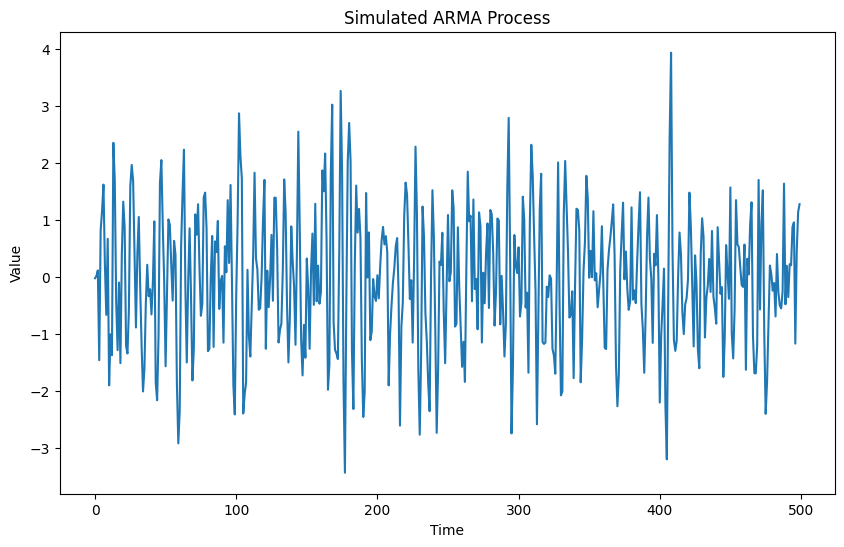

In [315]:
# Q1.2 Plot the simulated ARMA process, check for any patterns
plt.figure(figsize=(10, 6))
plt.plot(simulated_data)
plt.title('Simulated ARMA Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

<Figure size 1200x600 with 0 Axes>

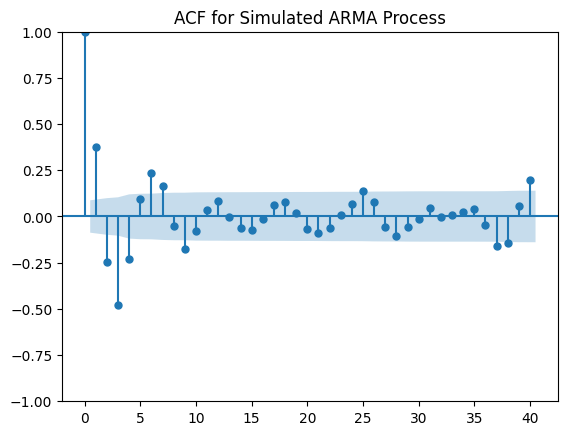

<Figure size 1200x600 with 0 Axes>

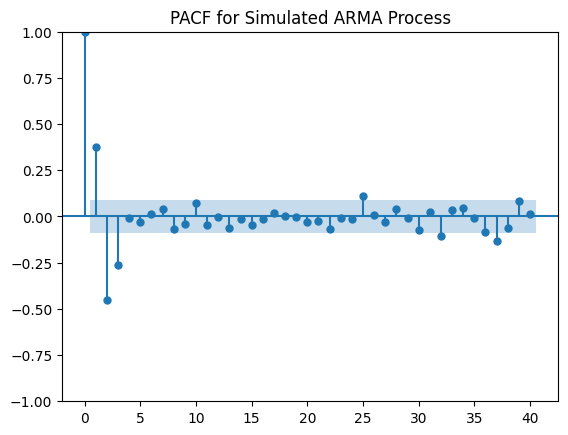

In [316]:
# Q1.3 Plot the ACF and PACF to observe the pattern of different ARMA processes.

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(simulated_data, lags=40, alpha=0.05, title='ACF for Simulated ARMA Process')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(simulated_data, lags=40, alpha=0.05, title='PACF for Simulated ARMA Process')
plt.show()

In [317]:
# Q1.4  Play around the ARMA parameters and repeat 1.1-1.3 to observe how ACF and PACF behaves in different cases. Save it for Activity 2
df.to_csv("ARMA.csv",index=False)

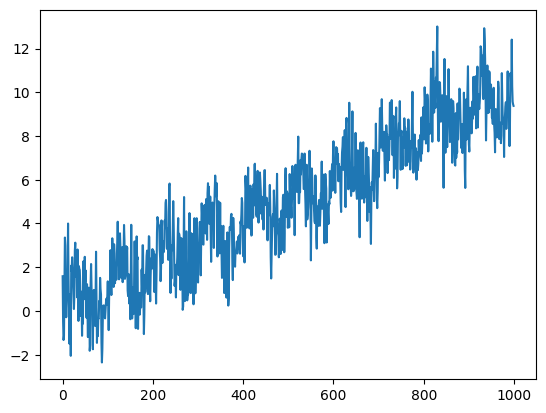

In [143]:
# Q1.5 (non compulsory) If you want to add more complexity into the problem, try generate a trend (maybe time*step), seaonal component (for example sin wave). 
# Add them together with the ARMA process you generated, composite into a complex time series. 
# Save it for Activity 2


np.random.seed(50)
time = np.arange(n_points)
# Generate a trend component
trend = 0.01 * time 
# Generate a seasonal component
seasonality = 1 * np.sin(2 * np.pi * time / 50)  # Seasonal pattern with a period of 50 time units


# Combine all component
series = trend + seasonality + simulated_data
plt.plot(series)
series = pd.DataFrame({'ARMA':series}).to_csv("ARMA.csv",index=False)



## Activity2. TSA with AR/ MA models


In this part, exchange the ARMA data you generated with your friend, or your group members, without telling them the parameters you used to generate the time series. You can use the forum to upload your data file or send an email etc. \
Do TSA for your friend's time seires. \
If you do not want to do it with your group members, you can use the data on BB, or use a real world TS e.g. Yahoo finance.

(-19.477398547529507, 0.0, 2, 497, {'1%': -3.4435761493506294, '5%': -2.867372960189225, '10%': -2.5698767442886696}, 1306.3208571914163)


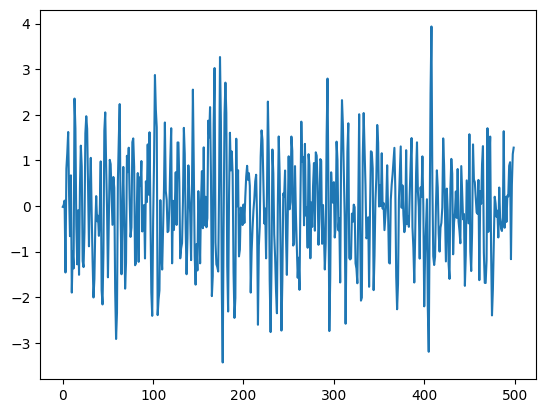

In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Q2.1 Load data into a dataframe plot it out , visual inspection for stationarity, ADF test for stationarity.

df=pd.read_csv('ARMA.csv')
plt.plot(df)
print(adfuller(df))

# You can try real life data from yahoo finance for this activity 

#symbol = 'AAPL'  # Example: Apple Inc.
#start_date = '2023-01-01'
#end_date = '2024-01-01'
#data = yf.download(symbol, start=start_date, end=end_date)
#df = data['Close']


<Figure size 1200x600 with 0 Axes>

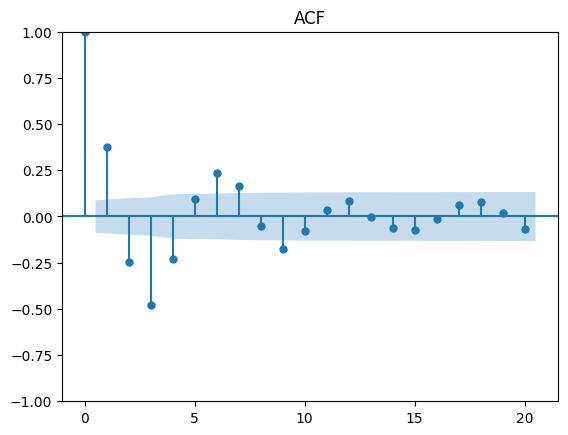

<Figure size 1200x600 with 0 Axes>

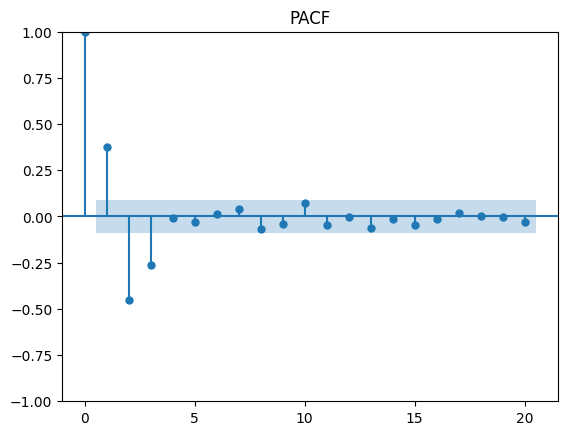

In [320]:
# Q2.2 If the time series is not stationary, stablize the time series (most common approach is differencing).
# After differencing, visual inspect the differenced data and do ADF check. 
# Do model selection using ACF, PACF (refer to the last section of lecture notes if you forgot)
# Note :If the data your friend generated  is not made of simple AR/ MA models(i.e. with other components), this step of model selection maybe not obvious.


# Depending on your data , if it is already stationary, this step is not necessary.
#df['diff']=df['ARMA'].diff()
#df.dropna(inplace=True)
#print(adfuller(df['diff']))



# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df, lags=20, alpha=0.05, title='ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df, lags=20, alpha=0.05, title='PACF')
plt.show()

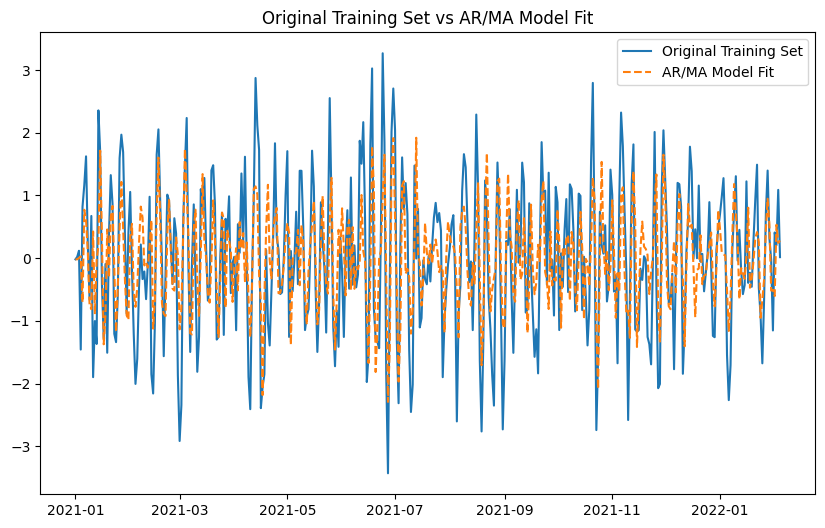

In [321]:
# Q 2.3 Divide the data into training and test dataset, do AR/ MA model on the train set
## Note : if your data is not generated by simple AR/MA models, you may not get a good fitting in this section.

from statsmodels.tsa.arima.model import ARIMA


#Convert df index into a fake datetime index for futrue modeling convinience 

dates = pd.date_range(start='2021-01-01', periods=len(df), freq='D')  # Daily frequency, adjust as needed
df.index = dates

# Divide the data into 8:2 train and test sets
train_size = (int)(0.8 * df.shape[0])

#Breaking data set into test and training
df_train = pd.DataFrame(df[0:train_size])
df_test = pd.DataFrame(df[train_size:df.shape[0]])


# Fit an AR/ MA model on the training data
# Note the parameter for ARIMA orders are:  (p,d,q), so order=(0,0,1) specifies an MA(1) model with no differencing
arma_model = ARIMA(df_train, order=(3, 0, 0))
arma_result = arma_model.fit()

# Plot the original training set and the model fit
plt.figure(figsize=(10, 6))
plt.plot(df_train.index, df_train, label='Original Training Set')
plt.plot(df_train.index, arma_result.fittedvalues, label='AR/MA Model Fit', linestyle='--')
plt.title('Original Training Set vs AR/MA Model Fit')
plt.legend()
plt.show()



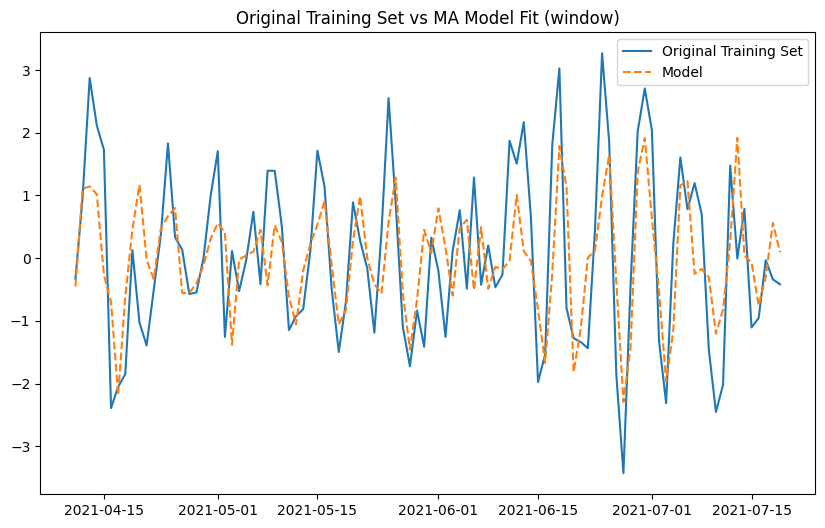

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ARMA   No. Observations:                  400
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -544.020
Date:                Sun, 18 Feb 2024   AIC                           1098.040
Time:                        02:52:06   BIC                           1117.997
Sample:                    01-01-2021   HQIC                          1105.943
                         - 02-04-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0192      0.041     -0.464      0.643      -0.100       0.062
ar.L1          0.4385      0.051      8.551      0.000       0.338       0.539
ar.L2         -0.3191      0.051     -6.238      0.000      -0.419      -0.219
ar.L3         -0.2654      0.052     -5.116      0.000      -0.367      -0.164
sigma2         0.8869      0.071     12.579      0.000       0.749       1.025
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.22
Prob(Q):                              0.95   Prob(JB):                         0.20
Heteroskedasticity (H):               0.79   Skew:                            -0.10
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [322]:
# Q 2.4 Check fitting results by visual inspection and use model.fit.summary() statistics.
# We will talk about the fitting results next lecture but for now just pay attention to the fitting coefficient part(where it shows : const and  ar.L1	/ma.L1 ... coef，std err，z，P>|z| etc).
# Check the model fitting constant part and find out whether your model fit to an AR/ MA model, and what are the coefficients. 
# Go back to your friend and check with them about the model and coefficients.


# If the whole plot of training dataset is not obvious, zoom in a ob window
start_index = 100
end_index = 200

# Adjust the plot command to focus on the specified window
plt.figure(figsize=(10, 6))
plt.plot(df_train.index[start_index:end_index], df_train[start_index:end_index], label='Original Training Set')
plt.plot(df_train.index[start_index:end_index], arma_result.fittedvalues[start_index:end_index], label='Model', linestyle='--')
plt.title('Original Training Set vs MA Model Fit (window)')
plt.legend()
plt.show()
arma_result.summary()

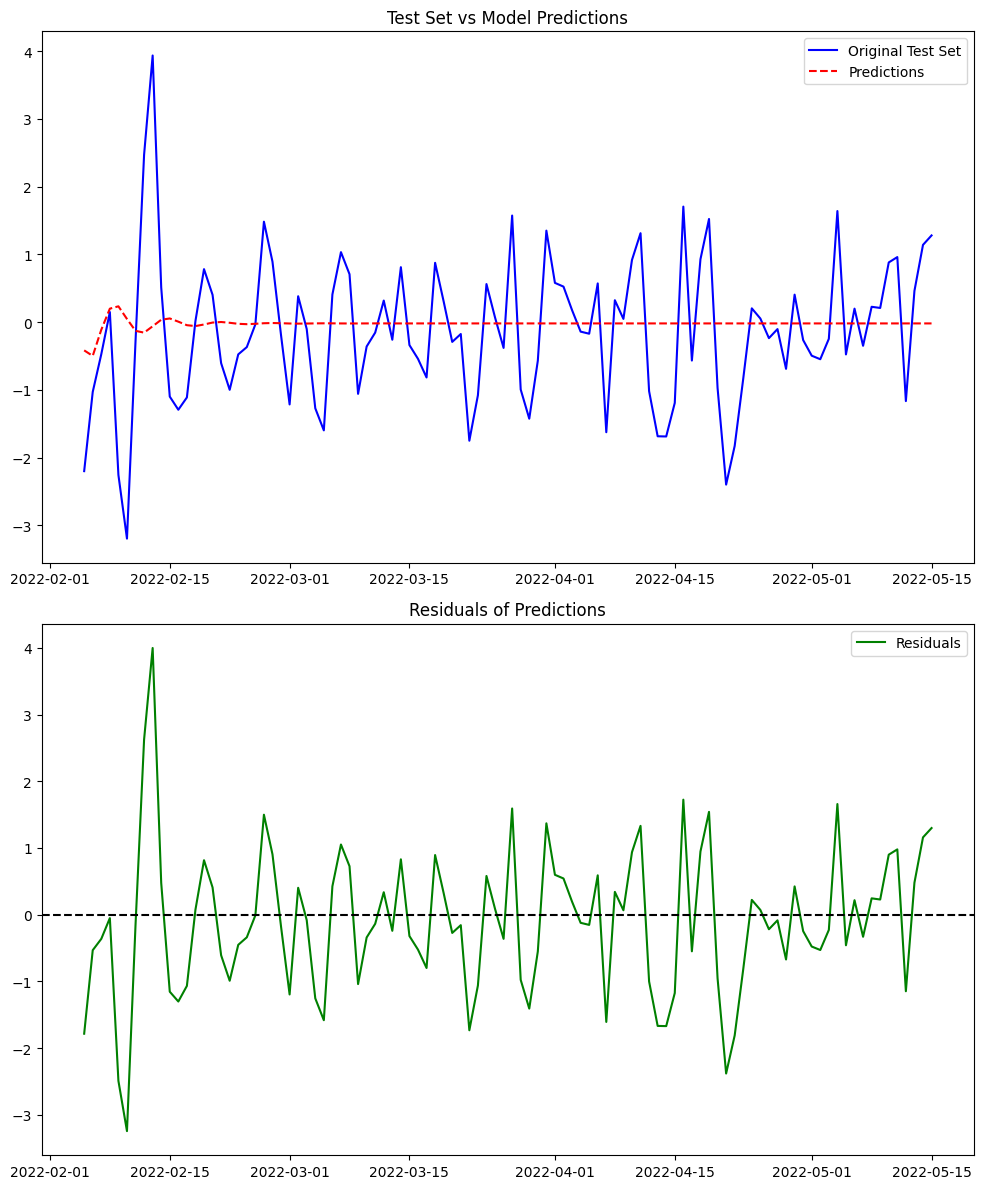

In [331]:
# Q 2.5  Use the model to do prediction on the test dataframe. What do you find?

# Predict on the test set
# Note: The start and end parameters should be adjusted based on the test set's time index
predictions = arma_result.predict(start=df_test.index[0], end=df_test.index[-1],dynamic=True)
residuals = df_test['ARMA']-predictions

# Plot the original test data and the predictions
fig, axs = plt.subplots(2, 1, figsize=(10, 12))  # 2 rows, 1 column

# Plot the original test data and the predictions on the first subplot
axs[0].plot(df_test.index, df_test, label='Original Test Set', color='blue')
axs[0].plot(df_test.index, predictions, label='Predictions', linestyle='--', color='red')
axs[0].set_title('Test Set vs Model Predictions')
axs[0].legend()

# Plot the residuals on the second subplot
axs[1].plot( df_test.index,residuals, label='Residuals', color='green')
axs[1].axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at 0
axs[1].set_title('Residuals of Predictions')
axs[1].legend()

plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
plt.show()

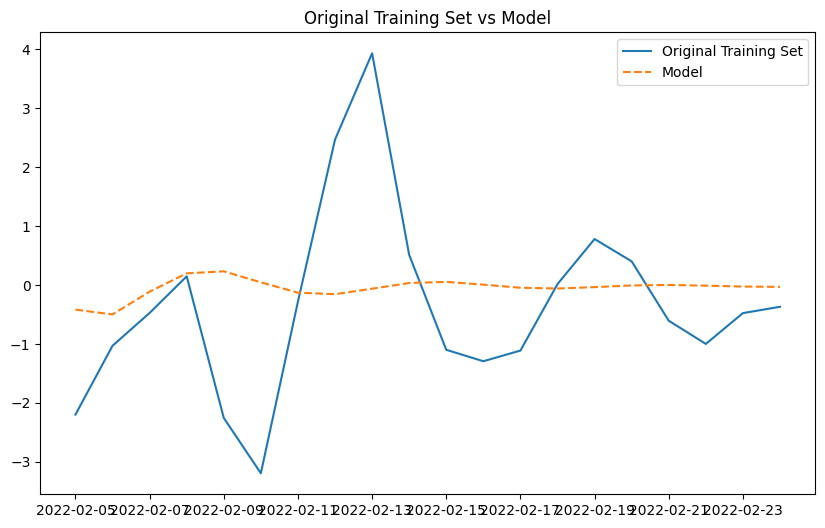

2022-02-05   -0.417053
2022-02-06   -0.498769
2022-02-07   -0.111876
2022-02-08    0.198774
2022-02-09    0.233241
                ...   
2022-05-11   -0.019201
2022-05-12   -0.019201
2022-05-13   -0.019201
2022-05-14   -0.019201
2022-05-15   -0.019201
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

In [332]:
# If the whole plot of testing dataset is not obvious, zoom in a smaller ob window at the beginning of the prediction, or list the prediction and inspect the numerical values.
start_index = 0
end_index = 20

# Adjust the plot command to focus on the specified window
plt.figure(figsize=(10, 6))
plt.plot(df_test.index[start_index:end_index], df_test[start_index:end_index], label='Original Training Set')
plt.plot(df_test.index[start_index:end_index], predictions[start_index:end_index], label='Model', linestyle='--')
plt.title('Original Training Set vs Model')
plt.legend()
plt.show()

predictions

Q 2.6 Waht do you find out by the results?/

TSA prediction is hard. Simple model of AR or MA are very likely to be not sufficient to model complex time series (if you add components in activity 1, activity 2 may not get the original coeficients).Using AR or MA models directly on non-stationary data can lead to misleading results because these models assume the process generating the time series is stationary.

AR/ MA models of stationary process converges to long term mean very quickly, indicating their short memory property.  So it is not accurate to use AR/ MA to do long term prediction, other models, such as ARIMA (for integrated processes), SARIMA (for seasonal data), or even more advanced machine learning and deep learning models, might be better suited for capturing the complexities of the time series over longer horizons.





Q 2.7 * Bonus question.

You can see that AR/ MA only has short term predictability. A method to deal with this is rolling prediction. For example we used t = 1 to 800 to train the model, now when we do prediction, instead of using Y_800 to predict Y_801 ,Y_802, Y_803, Y_804 ...  we can use  Y_800 to predict Y_801, use the actual value of Y_801 to predict Y_802, then use Y_802 for Y_803, so on so forth.




## Partial autocorrelation function 

A partial autocorrelation is the direct relationship between a time series and a lagged self (with the relationships of intermidary middle terms removed).
Although ACF and PACF can be calculated using developed packages, for stduents interested in the details, this section provides an example of how to implement PACF from scrach.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps. We can define the PACF with lag 2 just described as following equation: 

$\operatorname{PACF}\left(\boldsymbol{T}_{i}, \boldsymbol{k}=\mathbf{2}\right)=\frac{\operatorname{Cov}\left(T_{i}\left|T_{(i-1)}, T_{(i-2)}\right| T_{(i-1)}\right)}{\sigma_{T_{i} \mid T_{(i-1)}} \times \sigma_{T_{(i-2)} \mid T_{(i-1)}}}$

In [70]:
# Implementation of PACF(k=2) from scratch.

import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# import the dataframe 
df = pd.read_csv('southern_osc.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
df.head()

C:\Users\rf23386\AppData\Local\Temp\ipykernel_4088\3381354064.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('southern_osc.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
C:\Users\rf23386\AppData\Local\Temp\ipykernel_4088\3381354064.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('southern_osc.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])


,T_i
Date,
Jan-51,1.5
Feb-51,0.9
Mar-51,-0.1
Apr-51,-0.3
May-51,-0.7


(-7.787181201947421, 8.120958875745006e-12, 2, 819, {'1%': -3.4383596631852327, '5%': -2.865075444948184, '10%': -2.568652576059133}, 1702.8647943323735)


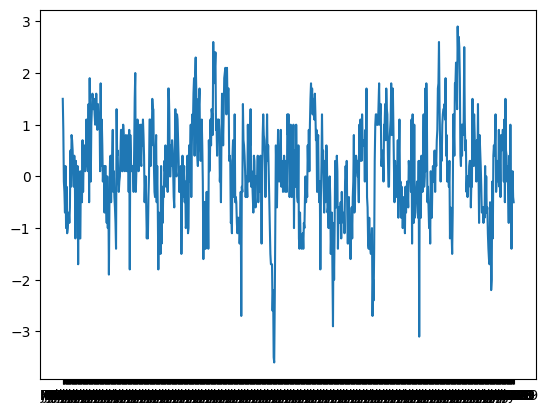

In [60]:
print(adfuller(df['T_i']))
plt.plot(df['T_i'])

In [61]:
# Add two columns containing the LAG=1 and LAG=2 version of the data to the DataFrame
df['T_(i-1)'] = df['T_i'].shift(1)
df['T_(i-2)'] = df['T_i'].shift(2)

In [64]:
#Drop the top few rows as they contain NaNs after shifting
df = df.drop(df.index[[0, 1]])
df.head()

,T_i,T_(i-1),T_(i-2)
Date,,,
Mar-51,-0.1,0.9,1.5
Apr-51,-0.3,-0.1,0.9
May-51,-0.7,-0.3,-0.1
Jun-51,0.2,-0.7,-0.3
Jul-51,-1.0,0.2,-0.7


In [65]:
#fit a linear regression model on Ti and T_i-1 and add it's predictions to the DataFrame as a new column
lm = linear_model.LinearRegression()
df_X = df[['T_(i-1)']] # Double brackets! [[]]
df_y = df['T_i'] # Single bracket! []
model = lm.fit(df_X,df_y)
df['Predicted_T_i|T_(i-1)'] = lm.predict(df_X)

In [66]:
#create the time series of residuals corresponding to the predictions of this model and add it to the DataFrame.
# This gives us the first one of the two time series we need for calculating the PACF for X at LAG=2
# Residual = Observed value - predicted
df['Residual_T_i|T_(i-1)'] = df['T_i'] - df['Predicted_T_i|T_(i-1)']
df.head()

,T_i,T_(i-1),T_(i-2),Predicted_T_i|T_(i-1),Residual_T_i|T_(i-1)
Date,,,,,
Mar-51,-0.1,0.9,1.5,0.608547,-0.708547
Apr-51,-0.3,-0.1,0.9,-0.017999,-0.282001
May-51,-0.7,-0.3,-0.1,-0.143308,-0.556692
Jun-51,0.2,-0.7,-0.3,-0.393927,0.593927
Jul-51,-1.0,0.2,-0.7,0.169965,-1.169965


In [67]:
# #repeat the above procedure to calculate the second time series of residuals of Ti-2 on Ti-1
lm = linear_model.LinearRegression()
df_X = df[['T_(i-1)']] #Note the double brackets! [[]]
df_y = df['T_(i-2)'] #Note the single brackets! []
model = lm.fit(df_X,df_y)
df['Predicted_T_(i-2)|T_(i-1)'] = lm.predict(df_X)
#Observed minus predicted
df['Residual_T_(i-2)|T_(i-1)'] = df['T_(i-2)'] - df['Predicted_T_(i-2)|T_(i-1)']

#Finally, apply the formula for Pearson's r to the two time series of residuals to get the value of the PACF at LAG=2
print(df.corr(method='pearson')['Residual_T_i|T_(i-1)']['Residual_T_(i-2)|T_(i-1)'])

0.2961230355462755


In [69]:
#Compare the calculated PACF(k=2) to the one calculated by statsmodels PACF function
# The difference is probably cased by erros is calculation and deletion of data (while shifting)
from statsmodels.tsa.stattools import pacf
print(pacf(df['T_i'], nlags=5)[2])

0.29965458413512597
